<a href="https://colab.research.google.com/github/Nwohalucy/Nwohalucy/blob/main/8_route_q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(0, 1) 

(1, 2) 

(2, 3) 

(2, 4) 

(4, 5) 

(4, 6) 

(6, 7) 

[[   0.    1.    0.    0.    0.    0.    0.    0.]
 [   1.    0.    1.    0.    0.    0.    0.    0.]
 [   0.    1.    0.    1.    1.    0.    0.    0.]
 [   0.    0.    1.    0.    0.    0.    0.    0.]
 [   0.    0.    1.    0.    0.    1.    1.    0.]
 [   0.    0.    0.    0.    1.    0.    0.    0.]
 [   0.    0.    0.    0.    1.    0.    0. 1000.]
 [   0.    0.    0.    0.    0.    0.    1. 1000.]]


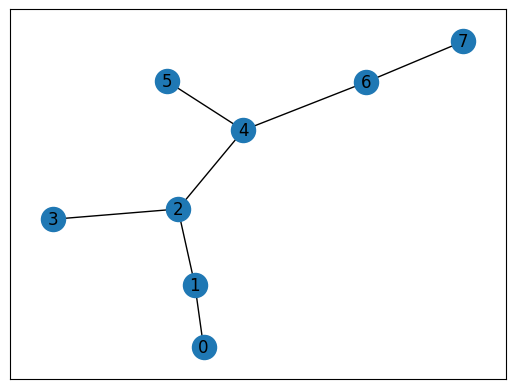

In [77]:
import numpy as np
import pylab as plt
import networkx as nx

# Define the state, action and Reward

points_state = [(0, 1), (1, 2), (2, 3), (2, 4), (4, 5), (4, 6), (6,7)]
goal = points_state[-1]
matrix_size = 8
gamma = 0.8
alpha = 0.75
num_state = 8


# Generate the R-Matrix
def generate(matrix_size, points_state, goal):
    R = np.array(np.zeros([matrix_size, matrix_size]))
    goal_state = goal[1]
    reward_goal = 1000
    for point in points_state:
        print(point, '\n')
        if point[1] == goal_state:
            R[point] = reward_goal
        else:
            R[point] = 1

        if point[0] == goal_state:
            R[point[::-1]] = reward_goal
        else:
            R[point[::-1]] = 1

    R[goal_state, goal_state] = reward_goal
    print(R)
    return R

R = generate(matrix_size, points_state, goal)


def showgraph(points_state):
    G=nx.Graph()
    G.add_edges_from(points_state)
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos)
    nx.draw_networkx_edges(G,pos)
    nx.draw_networkx_labels(G,pos)
    plt.show()

# Show the routing graph
showgraph(points_state)

In [78]:
# Initialize the Q-matrix values

Q = np.array(np.zeros([matrix_size, matrix_size]))
def generate_q(R, Q, gamma):
    reward_goal = 1000
    for i in range(1000):
        current_state = np.random.randint(0, num_state)
        available_act = []
        for j in range(num_state):
            if R[current_state, j] > 0:
                available_act.append(j)
        next_state = (np.random.choice(available_act))
        TD = R[current_state, next_state] + gamma * Q[next_state, np.argmax(Q[next_state, ])] - Q[current_state, next_state]
        Q[current_state, next_state] = Q[current_state, next_state] + alpha * TD

        # Clip Q-values to the reward_goal
        Q[current_state, next_state] = min(Q[current_state, next_state], reward_goal)

    print("Q-Values: \n\n")
    print(Q.astype(int))

score = generate_q(R, Q, gamma)

Q-Values: 


[[   0  412    0    0    0    0    0    0]
 [ 331    0  514    0    0    0    0    0]
 [   0  412    0  412  641    0    0    0]
 [   0    0  514    0    0    0    0    0]
 [   0    0  514    0    0  514  801    0]
 [   0    0    0    0  641    0    0    0]
 [   0    0    0    0  641    0    0 1000]
 [   0    0    0    0    0    0  801 1000]]


In [86]:
# Testing the model (i.e Computing the optimal/shortest route to get to the destination)
#The inference mode takes as input 1) The starting point/state and 2) The ending/destination state and it will return as output
# the shortest route to reach the destination within the shortest period of time enclosed in a list'''

# Testing =======================================================

current_state = 0
goal_state = goal[1]
def update_q(starting_state, ending_state):
    current_state = starting_state
    goal_state = ending_state
    steps = [current_state]
    while current_state != goal_state:
        next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[0]
        if next_step_index.shape[0] > 1:
            next_step_index = int(np.random.choice(next_step_index, size= 1))
        else:
            next_step_index = int(next_step_index)
        steps.append(next_step_index)
        current_state = next_step_index


        # Display Results ===============================================
    print("Most efficient path: ")
    print(f"The Best Step of the Seven routes are: {steps}\n")



learnt_bot = update_q(0, 7)



Most efficient path: 
The Best Step of the Seven routes are: [0, 1, 2, 4, 6, 7]



<ipython-input-86-17c30172b25e>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_step_index = int(next_step_index)


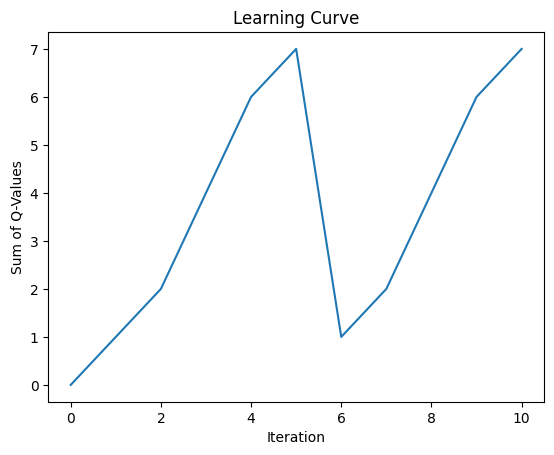

In [82]:

plt.plot(steps)
plt.xlabel('Iteration')
plt.ylabel('Sum of Q-Values')
plt.title('Learning Curve')
plt.show()

In [1]:
import gym
env = gym.make('CartPole-v0')
for i_episode in range(50):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To mainta

[ 0.01368883 -0.01193608 -0.0055043  -0.03275692]
[ 0.01345011  0.18326437 -0.00615944 -0.32717142]
[ 0.01711539  0.37847346 -0.01270287 -0.62179035]
[ 0.02468486  0.18353118 -0.02513868 -0.3331351 ]
[ 0.02835549 -0.01122411 -0.03180138 -0.04848444]
[ 0.028131   -0.20587596 -0.03277107  0.23399767]
[ 0.02401349 -0.40051472 -0.02809112  0.5161661 ]
[ 0.01600319 -0.5952301  -0.01776779  0.7998662 ]
[ 0.00409859 -0.39986897 -0.00177047  0.50164735]
[-0.00389879 -0.59496593  0.00826248  0.7937718 ]


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


[-0.01579811 -0.7902003   0.02413791  1.0890425 ]
[-0.03160211 -0.98563206  0.04591876  1.3892006 ]
[-0.05131476 -0.7911113   0.07370277  1.1112224 ]
[-0.06713698 -0.9871199   0.09592722  1.4260862 ]
[-0.08687938 -1.1832875   0.12444894  1.747144  ]
[-0.11054513 -0.9897804   0.15939182  1.4956219 ]
[-0.13034074 -1.186441    0.18930426  1.8335363 ]
Episode finished after 17 timesteps
[-0.04867306 -0.03762542  0.04640905 -0.03445873]
[-0.04942556  0.15680134  0.04571988 -0.3121455 ]
[-0.04628954 -0.03894112  0.03947697 -0.00540166]
[-0.04706836 -0.23460634  0.03936893  0.29947072]
[-0.05176049 -0.43026668  0.04535835  0.6043053 ]
[-0.06036582 -0.62599266  0.05744445  0.91092306]
[-0.07288568 -0.4316931   0.07566292  0.6368339 ]
[-0.08151954 -0.62778413  0.0883996   0.9523526 ]
[-0.09407522 -0.8239773   0.10744665  1.2714489 ]
[-0.11055476 -0.63037825  0.13287562  1.0142535 ]
[-0.12316233 -0.82699794  0.15316069  1.3455338 ]
[-0.13970229 -1.0236778   0.18007137  1.6819535 ]
Episode finish

In [93]:
import gym

# Replace 'CartPole-­v0' with 'CartPole-v0'
env = gym.make('CartPole-v0')

for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To mainta

[ 0.01608461  0.03489343 -0.03015647  0.02494215]
[ 0.01678248 -0.15978336 -0.02965762  0.3079599 ]
[ 0.01358681  0.03574834 -0.02349843  0.00607327]
[ 0.01430178  0.23119928 -0.02337696 -0.29393008]
[ 0.01892576  0.4266466  -0.02925556 -0.5938932 ]
[ 0.02745869  0.23194608 -0.04113342 -0.3105673 ]
[ 0.03209762  0.4276292  -0.04734477 -0.6159335 ]
[ 0.0406502   0.6233795  -0.05966344 -0.92314416]


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


[ 0.05311779  0.8192546  -0.07812632 -1.2339646 ]
[ 0.06950288  1.0152891  -0.10280561 -1.5500652 ]
[ 0.08980867  1.2114834  -0.13380691 -1.8729743 ]
[ 0.11403833  1.4077892  -0.1712664  -2.204023  ]
Episode finished after 12 timesteps
[-0.00826322 -0.02709376  0.03985932 -0.02083438]
[-0.0088051   0.16743457  0.03944264 -0.30067956]
[-0.0054564   0.36197278  0.03342905 -0.58066684]
[ 0.00178305  0.55661076  0.02181571 -0.86263436]
[ 0.01291527  0.751429    0.00456302 -1.1483788 ]
[ 0.02794385  0.5562478  -0.01840456 -0.85426855]
[ 0.0390688   0.36138144 -0.03548993 -0.5674292 ]
[ 0.04629643  0.16677481 -0.04683851 -0.28613493]
[ 0.04963193  0.36253238 -0.05256121 -0.5932147 ]
[ 0.05688258  0.55834913 -0.06442551 -0.9019801 ]
[ 0.06804956  0.754282   -0.0824651  -1.2141976 ]
[ 0.0831352   0.9503654  -0.10674906 -1.5315405 ]
[ 0.10214251  0.7566799  -0.13737987 -1.2739906 ]
[ 0.1172761   0.9532607  -0.16285968 -1.6063465 ]
[ 0.13634132  0.7603962  -0.19498661 -1.3685471 ]
Episode finish